In [368]:
import pybroker as pyb
from datetime import datetime
from pybroker import ExecContext, Strategy, YFinance, StrategyConfig, portfolio, context
import talib
from datetime import datetime , timedelta
import pandas as pd
import numpy as np

pyb.enable_data_source_cache('rebalancing')
#p = portfolio.Portfolio(10000)
config = StrategyConfig(initial_cash=10000)




In [319]:
config.initial_cash

10000

Decimal('10000')

In [ ]:
config.

In [370]:

def get_mva(df, w):

# Calculate the daily returns
 df['Daily Return'] = df['close'].pct_change()

# Calculate the 60-day moving average return
 df['mva'] = df['Daily Return'].rolling(window=w).mean()

# Print the DataFrame with the calculated values
 return df[["date", "mva"]]




In [399]:

start_date = "01/01/20"
end_date = "01/01/23"
yf = YFinance()
start_date_temp = datetime.strptime(start_date, "%m/%d/%y")

# Convert start date string to datetime object

# Add 60 days

bnd_start_date = start_date_temp - timedelta(days=120)
# Convert end date to string format

bnd_start_date = bnd_start_date.strftime("%m/%d/%Y")

old_tech_secs = ["INTC", "MSFT" , "COHU","CGNX" , "AMD" , "ADSK" ,"AMAT","TXN","IBM","GE", "HPQ"]

stock_data = {}
mva = {}
for s in old_tech_secs:
    data = yf.query(s,bnd_start_date , end_date)
    stock_data[s] = data 
    mva[s] = get_mva(data,60)

    

    









Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.



In [376]:
mva["IBM"]

,date,mva
0,2019-09-03,NaN
1,2019-09-04,NaN
2,2019-09-05,NaN
3,2019-09-06,NaN
4,2019-09-09,NaN
...,...,...
835,2022-12-23,0.002677
836,2022-12-27,0.003154
837,2022-12-28,0.002495
838,2022-12-29,0.002071


In [377]:
mva["INTC"]

,date,mva
0,2019-09-03,NaN
1,2019-09-04,NaN
2,2019-09-05,NaN
3,2019-09-06,NaN
4,2019-09-09,NaN
...,...,...
835,2022-12-23,0.000185
836,2022-12-27,0.000474
837,2022-12-28,-0.000559
838,2022-12-29,-0.000573


In [378]:
set_inital_allocations =  {
    "INTC" : 0.07,
    "MSFT" : 0.07,
    "TXN" :  0.07,
    "AMD" :  0.07,
    "HPQ" :  0.07,
    "GE" :   0.07,
    "IBM" :  0.07,
    "CGNX" : 0.00,
    "COHU" : 0.00,
    "ADSK" : 0.00,
    "AMAT" : 0.00

}

start_0 = start_date_temp - timedelta(days=2)
# Convert end date to string format

start_0 = start_0.strftime("%Y-%m-%d")

mv_0 = {}
for k,m in mva.items():
    df = mva[k]
    mv = df[df["date"]==start_0]["mva"].values[0]
    mv_0[k] = mv

mv_0 = dict(sorted(mv_0.items(), key=lambda x: x[1], reverse=True))

to_buy = list(mv_0.keys())[:3]

for t in to_buy:
    set_inital_allocations[t]+=0.17
    











print(start_0)







2019-12-30


In [379]:
set_inital_allocations

{'INTC': 0.07,
 'MSFT': 0.07,
 'TXN': 0.07,
 'AMD': 0.24000000000000002,
 'HPQ': 0.07,
 'GE': 0.24000000000000002,
 'IBM': 0.07,
 'CGNX': 0.0,
 'COHU': 0.17,
 'ADSK': 0.0,
 'AMAT': 0.0}

In [396]:
trigs = []

cur2=[]
trade_exec = {}
cur_port_val = 0 
def set_target_shares(
    ctxs: dict[str, ExecContext],
    targets: dict[str, float]
):
    #print(ctxs)
    for symbol, target in targets.items():
        ctx = ctxs[symbol]
        target_shares = ctx.calc_target_shares(target)
        #print(target_shares)
        pos = ctx.long_pos()
        if pos is None:
            ctx.buy_shares = target_shares
        elif pos.shares < target_shares:
            ctx.buy_shares = target_shares - pos.shares
        elif pos.shares > target_shares:
            ctx.sell_shares = pos.shares - target_shares


    #print(((ctxs["TSLA"]._curr_date)))
def shell(ctxs:dict[str, ExecContext]):
    #print(ctxs)
    pass 
    

def buy_low(ctxs: dict[str, ExecContext]):
    # If shares were already purchased and are currently being held, then return.
    triggered = False 

    

    #for c in list(ctxs.keys()):
      #  pos = ctxs[c].long_pos()
       # if pos:
       #  cur_port_val += float(ctxs[c].open*float(pos.shares))

   # print(type(cur_port_val))

    dt = tuple(ctxs.values())[0].dt
    date_object = datetime.strptime(str(dt), "%Y-%m-%d %H:%M:%S")

# Convert datetime object to the desired format
    dt2 = date_object.strftime("%Y-%m-%d")
    st0 = start_date_temp.strftime("%Y-%m-%d")
    st0 = str(st0)
    #print(dt2)
    if dt2 == "2020-01-02":
       #print(dt2)
       for s in set_inital_allocations.keys():
          shares = ctxs[s].calc_target_shares(set_inital_allocations[s])
          ctxs[s].buy_shares = shares

    else:
        n_subst1 = ["INTC", "MSFT" , "TXN" , "AMD" , "HPQ"  , "GE" , "IBM"]

                    #shares_t

        mv_1 = {}
        for k,m in mva.items():
                df_temp = mva[k]
                mv = df_temp[df_temp["date"]==dt2]["mva"].values[0]
                mv_1[k] = mv

        mv_1 = dict(sorted(mv_1.items(), key=lambda x: x[1], reverse=True))

        to_buy = list(mv_1.keys())[:3]


        #print("To_buy is" , to_buy)

            
        set_n = set(n_subst1)
        set_tb = set(to_buy)

        common = list(set_tb.intersection(set_n))
        not_common = list(set_n.difference(set_tb))

        remain_stck = list(set_tb.difference(set_n))

          # print("Common is " , common)
          # print("Not common ", not_common)
          # print("remain_stck ", remain_stck)

        expected_alloc = {}

           
        for cx in common:
            #shares = ctxs[cx].calc_target_shares(0.24)
            expected_alloc[cx]=0.24
            #pos = ctxs[cx].long_pos()
            #if not pos: 
             #    ctxs[cx].buy_shares = shares
            #elif pos.shares < shares:
             #    ctxs[cx].buy_shares = shares - pos.shares
            #else:
             #    ctxs[cx].sell_shares = pos.shares - shares  


        for nc in not_common:
            expected_alloc[nc]=0.07
            #shares = ctxs[nc].calc_target_shares(0.07)
            #pos = ctxs[nc].long_pos()
                #print(pos.shares)
            #if not pos: 
            #    ctxs[nc].buy_shares = shares
            #elif pos.shares < shares:
            #     ctxs[nc].buy_shares = shares - pos.shares
            #else:
             #    ctxs[nc].sell_shares = pos.shares - shares
        
        if len(remain_stck) > 0 :

            for r in remain_stck:
                expected_alloc[r]=0.17
                    #shares = ctxs[r].calc_target_shares(0.17)
                    #pos = ctxs[r].long_pos()
                    #print(pos.shares)
                    #if not pos: 
                     #ctxs[r].buy_shares = shares
                    #elif pos.shares < shares:
                     #ctxs[r].buy_shares = shares - pos.shares
                    #else:
                     #ctxs[r].sell_shares = pos.shares - shares
                     
        for s in securities:
            if s not in list(expected_alloc.keys()):
                expected_alloc[s]=0.0

        #print(expected_alloc)
        total_eq = 0
        for s in list(ctxs.keys()):
            #totals.append(ctxs[s].total_equity)

            #print("Here man !!!!!")
            pos =ctxs[s].long_pos()
        
            if pos:
                positions_x = pos.shares 
                #print("XXXXXXXXXX" ,pos.shares)
            else:
                positions_x = 0
            #print(total_eq)

            total_eq  += (ctxs[s].open[0] * float(positions_x))

        cur_allocs={}
        for ct in list(ctxs.keys()):
            #print(list(ctxs.keys()))
            #rint(ct)
            
            pos = ctxs[ct].long_pos()
            #print(ctxs[ct].total_equity)
            
            if pos:
                position_x = pos.shares
            else:
                position_x = 0


            
            cur_alloc = (ctxs[ct].open[0] * float(position_x)) / total_eq
           # print(cur_alloc)
            #print(cur_alloc)
                #print(pos.shares)
            #print(ct)
            #cur_allocs[ct] = cur_alloc
            
            #print(cur_)

            cur_allocs[ct] =  cur_alloc


       

        


            if abs(expected_alloc[ct] - cur_alloc) >= 0.05:
                    print(abs(expected_alloc[ct] - cur_alloc))
                    triggered = True 

        print(cur_allocs)
        print("Sum is ", sum(cur_allocs.values()))            
        cur2.append(cur_allocs)

        if triggered:
           #print("triggered")
           trigs.append("x")

           n_subst1 = ["INTC", "MSFT" , "TXN" , "AMD" , "HPQ"  , "GE" , "IBM"]

                    #shares_t

           mv_1 = {}
           for k,m in mva.items():
                df_temp = mva[k]
                mv = df_temp[df_temp["date"]==dt2]["mva"].values[0]
                mv_1[k] = mv

           mv_1 = dict(sorted(mv_1.items(), key=lambda x: x[1], reverse=True))

           to_buy = list(mv_1.keys())[:3]


           #print("To_buy is" , to_buy)

            
           set_n = set(n_subst1)
           set_tb = set(to_buy)

           common = list(set_tb.intersection(set_n))
           not_common = list(set_n.difference(set_tb))

           remain_stck = list(set_tb.difference(set_n))

           #print("Common is " , common)
           #print("Not common ", not_common)
           #print("remain_stck ", remain_stck)
           buys = {}
           sells = {}

           
           for cx in common:
                shares = ctxs[cx].calc_target_shares(0.24)
                pos = ctxs[cx].long_pos()
                if not pos: 
                 ctxs[cx].buy_shares = shares
                 buys[cx] = shares
                elif pos.shares < shares:
                 ctxs[cx].buy_shares = shares - pos.shares
                 buys[cx] = float(shares-pos.shares)
                else:
                 ctxs[cx].sell_shares = pos.shares - shares 
                 sells[cx] = float(pos.shares-shares) 


           for nc in not_common:
                shares = ctxs[nc].calc_target_shares(0.07)
                pos = ctxs[nc].long_pos()
                #print(pos.shares)
                if not pos: 
                 ctxs[nc].buy_shares = shares
                 buys[nc] = shares
                elif pos.shares < shares:
                 ctxs[nc].buy_shares = shares - pos.shares
                 buys[nc] = float(shares-pos.shares)
                else:
                 ctxs[nc].sell_shares = pos.shares - shares
                 sells[nc] = float(pos.shares-shares)
        
           if len(remain_stck) > 0 :

                for r in remain_stck:
                    shares = ctxs[r].calc_target_shares(0.17)
                    pos = ctxs[r].long_pos()
                    #print(pos.shares)
                    if not pos: 
                     ctxs[r].buy_shares = shares
                     buys[r] =  shares
                    elif pos.shares < shares:
                     ctxs[r].buy_shares = shares - pos.shares
                     buys[r] = float(shares-pos.shares)
                    else:
                     ctxs[r].sell_shares = pos.shares - shares
                     sells[r] = float(pos.shares-shares)

            
           trade_exec[dt2] = {"buy" : buys , "sells" : sells }  
                    
            



            
                
           
           #print(to_buy)

                

                


                 
                 



                

                

        else:
            print("not triggered")




   
       
 



      

strategy = Strategy(YFinance(), start_date=start_date, end_date=end_date,config=config)
strategy.set_before_exec(buy_low)
strategy.add_execution(shell, securities)

#strategy.add_execution(short_high, ['MSFT'])

result = strategy.backtest()





Backtesting: 2020-01-01 00:00:00 to 2023-01-01 00:00:00

Loaded cached bar data.

Test split: 2020-01-02 00:00:00 to 2022-12-30 00:00:00


  0% (0 of 756) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  1% (11 of 756) |                       | Elapsed Time: 0:00:00 ETA:  00:00:00


{'IBM': 0.06807116538953013, 'HPQ': 0.07198725051583423, 'INTC': 0.06989864648465412, 'AMAT': 0.0, 'ADSK': 0.0, 'GE': 0.23673456792667727, 'AMD': 0.23726552159868017, 'COHU': 0.18094069860836365, 'MSFT': 0.06699569415833788, 'TXN': 0.06810645531792255, 'CGNX': 0.0}
Sum is  1.0
not triggered
{'IBM': 0.06807116538953013, 'HPQ': 0.07198725051583423, 'INTC': 0.06989864648465412, 'AMAT': 0.0, 'ADSK': 0.0, 'GE': 0.23673456792667727, 'AMD': 0.23726552159868017, 'COHU': 0.18094069860836365, 'MSFT': 0.06699569415833788, 'TXN': 0.06810645531792255, 'CGNX': 0.0}
Sum is  1.0
not triggered
{'IBM': 0.06807116538953013, 'HPQ': 0.07198725051583423, 'INTC': 0.06989864648465412, 'AMAT': 0.0, 'ADSK': 0.0, 'GE': 0.23673456792667727, 'AMD': 0.23726552159868017, 'COHU': 0.18094069860836365, 'MSFT': 0.06699569415833788, 'TXN': 0.06810645531792255, 'CGNX': 0.0}
Sum is  1.0
not triggered
{'IBM': 0.06807116538953013, 'HPQ': 0.07198725051583423, 'INTC': 0.06989864648465412, 'AMAT': 0.0, 'ADSK': 0.0, 'GE': 0.2367

  4% (31 of 756) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04
  5% (41 of 756) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:04


{'IBM': 0.06545219831671917, 'HPQ': 0.0734126231928539, 'INTC': 0.06720936898323618, 'AMAT': 0.0, 'ADSK': 0.14947045716135537, 'GE': 0.06401993973753015, 'AMD': 0.2376426856078121, 'COHU': 0.16457491324003568, 'MSFT': 0.11273168325852441, 'TXN': 0.06548613050193305, 'CGNX': 0.0}
Sum is  1.0
not triggered
{'IBM': 0.06545219831671917, 'HPQ': 0.0734126231928539, 'INTC': 0.06720936898323618, 'AMAT': 0.0, 'ADSK': 0.14947045716135537, 'GE': 0.06401993973753015, 'AMD': 0.2376426856078121, 'COHU': 0.16457491324003568, 'MSFT': 0.11273168325852441, 'TXN': 0.06548613050193305, 'CGNX': 0.0}
Sum is  1.0
not triggered
{'IBM': 0.06545219831671917, 'HPQ': 0.0734126231928539, 'INTC': 0.06720936898323618, 'AMAT': 0.0, 'ADSK': 0.14947045716135537, 'GE': 0.06401993973753015, 'AMD': 0.2376426856078121, 'COHU': 0.16457491324003568, 'MSFT': 0.11273168325852441, 'TXN': 0.06548613050193305, 'CGNX': 0.0}
Sum is  1.0
not triggered
{'IBM': 0.06545219831671917, 'HPQ': 0.0734126231928539, 'INTC': 0.0672093689832361

  6% (51 of 756) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:04
  8% (61 of 756) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:04


0.1669506137354559
0.14873089511642304
0.18949442725102103
0.14385094260224723
{'IBM': 0.06512834862393223, 'HPQ': 0.07304938626454409, 'INTC': 0.06687682501897844, 'AMAT': 0.0, 'ADSK': 0.14873089511642304, 'GE': 0.07785943817648207, 'AMD': 0.21754950923413696, 'COHU': 0.18949442725102103, 'MSFT': 0.09614905739775276, 'TXN': 0.06516211291672937, 'CGNX': 0.0}
Sum is  1.0000000000000002
0.15659646839781954
0.14858573394268912
0.1893094809192299
0.14394478396596888
{'IBM': 0.06506478343445224, 'HPQ': 0.08340353160218043, 'INTC': 0.0668115533186518, 'AMAT': 0.0, 'ADSK': 0.14858573394268912, 'GE': 0.07778344745899787, 'AMD': 0.2078877385164271, 'COHU': 0.1893094809192299, 'MSFT': 0.0960552160340311, 'TXN': 0.06509851477334046, 'CGNX': 0.0}
Sum is  1.0000000000000002
0.1731884466813482
0.14858573394268912
0.1893094809192299
0.14394478396596888
{'IBM': 0.06506478343445224, 'HPQ': 0.08340353160218043, 'INTC': 0.0668115533186518, 'AMAT': 0.0, 'ADSK': 0.14858573394268912, 'GE': 0.077783447458997

  9% (71 of 756) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:04


0.16102010737973999
0.14862484568866147
0.05096139987383766
0.18935931224644686
0.11189266621289162
{'IBM': 0.06508191022861955, 'HPQ': 0.07091166279925606, 'INTC': 0.07897989262026002, 'AMAT': 0.0, 'ADSK': 0.14862484568866147, 'GE': 0.07780392214628545, 'AMD': 0.18903860012616233, 'COHU': 0.18935931224644686, 'MSFT': 0.12810733378710837, 'TXN': 0.05209252035719989, 'CGNX': 0.0}
Sum is  1.0
0.16102010737973999
0.14862484568866147
0.05096139987383766
0.18935931224644686
0.11189266621289162
{'IBM': 0.06508191022861955, 'HPQ': 0.07091166279925606, 'INTC': 0.07897989262026002, 'AMAT': 0.0, 'ADSK': 0.14862484568866147, 'GE': 0.07780392214628545, 'AMD': 0.18903860012616233, 'COHU': 0.18935931224644686, 'MSFT': 0.12810733378710837, 'TXN': 0.05209252035719989, 'CGNX': 0.0}
Sum is  1.0
0.16114083653375721
0.14839765682715958
0.055969106314905315
0.18906985642656213
0.11208849187836686
{'IBM': 0.06498242561673856, 'HPQ': 0.0770506138612463, 'INTC': 0.07885916346624276, 'AMAT': 0.0, 'ADSK': 0.148

 10% (81 of 756) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:04
 12% (91 of 756) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:04


0.14609745132788873
0.06346723607750979
0.1861392203720774
0.11407115629970671
0.17
{'IBM': 0.06397517970763587, 'HPQ': 0.08610716001644977, 'INTC': 0.05972063400769919, 'AMAT': 0.0, 'ADSK': 0.14609745132788873, 'GE': 0.10429207001221798, 'AMD': 0.1765327639224902, 'COHU': 0.1861392203720774, 'MSFT': 0.12592884370029328, 'TXN': 0.05120667693324759, 'CGNX': 0.0}
Sum is  1.0
0.14609745132788873
0.06346723607750979
0.1861392203720774
0.11407115629970671
0.17
{'IBM': 0.06397517970763587, 'HPQ': 0.08610716001644977, 'INTC': 0.05972063400769919, 'AMAT': 0.0, 'ADSK': 0.14609745132788873, 'GE': 0.10429207001221798, 'AMD': 0.1765327639224902, 'COHU': 0.1861392203720774, 'MSFT': 0.12592884370029328, 'TXN': 0.05120667693324759, 'CGNX': 0.0}
Sum is  1.0
0.14609745132788873
0.06346723607750979
0.1861392203720774
0.11407115629970671
0.17
{'IBM': 0.06397517970763587, 'HPQ': 0.08610716001644977, 'INTC': 0.05972063400769919, 'AMAT': 0.0, 'ADSK': 0.14609745132788873, 'GE': 0.10429207001221798, 'AMD': 0.

 13% (101 of 756) |##                    | Elapsed Time: 0:00:00 ETA:   0:00:04


0.09109669287935457
0.14570772079757616
0.06393815604959507
0.18564267415304192
0.17
{'IBM': 0.0638045190938628, 'HPQ': 0.07769865427231519, 'INTC': 0.14890330712064542, 'AMAT': 0.0, 'ADSK': 0.14570772079757616, 'GE': 0.10401385979442276, 'AMD': 0.17606184395040492, 'COHU': 0.18564267415304192, 'MSFT': 0.04709734315555437, 'TXN': 0.05107007766217646, 'CGNX': 0.0}
Sum is  0.9999999999999999
0.0849889403964593
0.10623422305596492
0.18582443368370594
0.17
{'IBM': 0.06386698899469595, 'HPQ': 0.07777472768053445, 'INTC': 0.1550110596035407, 'AMAT': 0.0, 'ADSK': 0.14585038070628042, 'GE': 0.09717465143411047, 'AMD': 0.17623422305596492, 'COHU': 0.18582443368370594, 'MSFT': 0.04714345534945876, 'TXN': 0.05112007949170839, 'CGNX': 0.0}
Sum is  1.0
0.1820103660511553
0.09340283479467587
{'IBM': 0.06255611178288774, 'HPQ': 0.08419717071389665, 'INTC': 0.20438578458571, 'AMAT': 0.0, 'ADSK': 0.12499968692467972, 'GE': 0.10197871142477409, 'AMD': 0.05451063018540256, 'COHU': 0.1820103660511553, 'MS

 14% (111 of 756) |###                   | Elapsed Time: 0:00:00 ETA:   0:00:04


0.1825513902213317
0.09317515041250488
{'IBM': 0.06274205926050166, 'HPQ': 0.08243679256660638, 'INTC': 0.21085027147080965, 'AMAT': 0.0, 'ADSK': 0.12537124736575772, 'GE': 0.09546305274237826, 'AMD': 0.054672662541590235, 'COHU': 0.1825513902213317, 'MSFT': 0.04631308780700782, 'TXN': 0.06277458643652142, 'CGNX': 0.07682484958749514}
Sum is  1.0
0.14127507242984363
0.09302037105388816
{'IBM': 0.06286846596019291, 'HPQ': 0.08058817398161217, 'INTC': 0.21127507242984364, 'AMAT': 0.0, 'ADSK': 0.12562383336313282, 'GE': 0.09565538256995873, 'AMD': 0.054782811792613725, 'COHU': 0.18291917730122526, 'MSFT': 0.046406394986453235, 'TXN': 0.06290105866885569, 'CGNX': 0.07697962894611185}
Sum is  0.9999999999999999
0.05948638809752452
{'IBM': 0.06519127841469126, 'HPQ': 0.08147653766573579, 'INTC': 0.06694144426227255, 'AMAT': 0.0, 'ADSK': 0.13026527959950945, 'GE': 0.0921046091602649, 'AMD': 0.061540788981357765, 'COHU': 0.22948638809752453, 'MSFT': 0.04812098036079903, 'TXN': 0.06522507533198

 16% (121 of 756) |###                   | Elapsed Time: 0:00:00 ETA:   0:00:04


0.0705246951468444
0.06523101156053515
{'IBM': 0.06117026502772874, 'HPQ': 0.07841132887952533, 'INTC': 0.06281248023415581, 'AMAT': 0.0705246951468444, 'ADSK': 0.10476898843946486, 'GE': 0.09971950984885422, 'AMD': 0.053303020284290105, 'COHU': 0.2131343523354158, 'MSFT': 0.04515286697308967, 'TXN': 0.061201977343218285, 'CGNX': 0.14980051548741277}
Sum is  1.0
0.07038671724597628
0.06543598664154547
{'IBM': 0.06105058858323652, 'HPQ': 0.08021436921937036, 'INTC': 0.06268959088095857, 'AMAT': 0.07038671724597628, 'ADSK': 0.10456401335845454, 'GE': 0.09952441381028372, 'AMD': 0.053198735695275674, 'COHU': 0.21271736605171912, 'MSFT': 0.045064527735463024, 'TXN': 0.061082238855228906, 'CGNX': 0.14950743856403326}
Sum is  1.0
0.07014203572691116
0.06579947683726922
{'IBM': 0.060838361740746284, 'HPQ': 0.07993552436796386, 'INTC': 0.062471666463874025, 'AMAT': 0.07014203572691116, 'ADSK': 0.10420052316273079, 'GE': 0.10579033866722728, 'AMD': 0.05301380382216707, 'COHU': 0.214163247495207

 17% (131 of 756) |###                   | Elapsed Time: 0:00:00 ETA:   0:00:04


0.09987449231699096
0.06582403031370612
0.21629760706960063
{'IBM': 0.06082402598468556, 'HPQ': 0.07796750109060396, 'INTC': 0.06245694584113685, 'AMAT': 0.07012550768300906, 'ADSK': 0.10417596968629389, 'GE': 0.10576541057177367, 'AMD': 0.0530013118197906, 'COHU': 0.21629760706960063, 'MSFT': 0.0448972904205877, 'TXN': 0.060855558800515214, 'CGNX': 0.14363287103200287}
Sum is  0.9999999999999999
0.09987449231699096
0.06582403031370612
0.21629760706960063
{'IBM': 0.06082402598468556, 'HPQ': 0.07796750109060396, 'INTC': 0.06245694584113685, 'AMAT': 0.07012550768300906, 'ADSK': 0.10417596968629389, 'GE': 0.10576541057177367, 'AMD': 0.0530013118197906, 'COHU': 0.21629760706960063, 'MSFT': 0.0448972904205877, 'TXN': 0.060855558800515214, 'CGNX': 0.14363287103200287}
Sum is  0.9999999999999999
0.09987449231699096
0.06582403031370612
0.21629760706960063
{'IBM': 0.06082402598468556, 'HPQ': 0.07796750109060396, 'INTC': 0.06245694584113685, 'AMAT': 0.07012550768300906, 'ADSK': 0.104175969686293

 18% (141 of 756) |####                  | Elapsed Time: 0:00:00 ETA:   0:00:04


0.09382382583103967
0.06554034574366575
0.21688661328520945
{'IBM': 0.06098965763382259, 'HPQ': 0.07622532121263985, 'INTC': 0.06262702414115491, 'AMAT': 0.07617617416896034, 'ADSK': 0.10445965425633426, 'GE': 0.09942508443174616, 'AMD': 0.05314564121168827, 'COHU': 0.21688661328520945, 'MSFT': 0.04501955151945049, 'TXN': 0.06102127631756715, 'CGNX': 0.14402400182142655}
Sum is  1.0
0.09382382583103967
0.06554034574366575
0.21688661328520945
{'IBM': 0.06098965763382259, 'HPQ': 0.07622532121263985, 'INTC': 0.06262702414115491, 'AMAT': 0.07617617416896034, 'ADSK': 0.10445965425633426, 'GE': 0.09942508443174616, 'AMD': 0.05314564121168827, 'COHU': 0.21688661328520945, 'MSFT': 0.04501955151945049, 'TXN': 0.06102127631756715, 'CGNX': 0.14402400182142655}
Sum is  1.0
0.09382382583103967
0.06554034574366575
0.21688661328520945
{'IBM': 0.06098965763382259, 'HPQ': 0.07622532121263985, 'INTC': 0.06262702414115491, 'AMAT': 0.07617617416896034, 'ADSK': 0.10445965425633426, 'GE': 0.0994250844317461

 19% (151 of 756) |####                  | Elapsed Time: 0:00:01 ETA:   0:00:04


0.07612104353621306
0.06561594584958524
0.19131841983592685
0.14391976799191444
{'IBM': 0.073134621442745, 'HPQ': 0.08007631680636053, 'INTC': 0.06258169937254257, 'AMAT': 0.07612104353621306, 'ADSK': 0.10438405415041477, 'GE': 0.09935312797192819, 'AMD': 0.04868158016407315, 'COHU': 0.2057837051682053, 'MSFT': 0.04498696972614906, 'TXN': 0.06097711366945394, 'CGNX': 0.14391976799191444}
Sum is  1.0
0.07612104353621306
0.06561594584958524
0.19131841983592685
0.14391976799191444
{'IBM': 0.073134621442745, 'HPQ': 0.08007631680636053, 'INTC': 0.06258169937254257, 'AMAT': 0.07612104353621306, 'ADSK': 0.10438405415041477, 'GE': 0.09935312797192819, 'AMD': 0.04868158016407315, 'COHU': 0.2057837051682053, 'MSFT': 0.04498696972614906, 'TXN': 0.06097711366945394, 'CGNX': 0.14391976799191444}
Sum is  1.0
0.07612104353621306
0.06561594584958524
0.19131841983592685
0.14391976799191444
{'IBM': 0.073134621442745, 'HPQ': 0.08007631680636053, 'INTC': 0.06258169937254257, 'AMAT': 0.07612104353621306, '

 21% (161 of 756) |####                  | Elapsed Time: 0:00:01 ETA:   0:00:04


0.07608511501045519
0.06566521429105728
0.19134139715370396
0.21006288704655313
0.1950342637649526
0.14385183900866416
{'IBM': 0.07310010248440929, 'HPQ': 0.07613420330494586, 'INTC': 0.06255216130930243, 'AMAT': 0.07608511501045519, 'ADSK': 0.10433478570894274, 'GE': 0.09930623408750888, 'AMD': 0.048658602846296015, 'COHU': 0.21006288704655313, 'MSFT': 0.04496573623504741, 'TXN': 0.06094833295787487, 'CGNX': 0.14385183900866416}
Sum is  0.9999999999999998
0.16386579669505413
0.07608511501045519
0.06566521429105728
0.19134139715370396
0.21006288704655313
0.14385183900866416
{'IBM': 0.07310010248440929, 'HPQ': 0.07613420330494586, 'INTC': 0.06255216130930243, 'AMAT': 0.07608511501045519, 'ADSK': 0.10433478570894274, 'GE': 0.09930623408750888, 'AMD': 0.048658602846296015, 'COHU': 0.21006288704655313, 'MSFT': 0.04496573623504741, 'TXN': 0.06094833295787487, 'CGNX': 0.14385183900866416}
Sum is  0.9999999999999998
0.16386579669505413
0.07608511501045519
0.06566521429105728
0.191341397153703

 22% (171 of 756) |####                  | Elapsed Time: 0:00:01 ETA:   0:00:04
 23% (181 of 756) |#####                 | Elapsed Time: 0:00:01 ETA:   0:00:04


0.16618900148666982
0.0757045504477027
0.1038129211879028
0.19158477905453705
0.20901218888110498
{'IBM': 0.07273446843712791, 'HPQ': 0.07381099851333016, 'INTC': 0.06789740316680672, 'AMAT': 0.0757045504477027, 'ADSK': 0.1038129211879028, 'GE': 0.10539682294445975, 'AMD': 0.04841522094546294, 'COHU': 0.20901218888110498, 'MSFT': 0.04474082541317662, 'TXN': 0.060643479956345996, 'CGNX': 0.13783112010657939}
Sum is  0.9999999999999999
0.16618900148666982
0.0757045504477027
0.1038129211879028
0.19158477905453705
0.20901218888110498
{'IBM': 0.07273446843712791, 'HPQ': 0.07381099851333016, 'INTC': 0.06789740316680672, 'AMAT': 0.0757045504477027, 'ADSK': 0.1038129211879028, 'GE': 0.10539682294445975, 'AMD': 0.04841522094546294, 'COHU': 0.20901218888110498, 'MSFT': 0.04474082541317662, 'TXN': 0.060643479956345996, 'CGNX': 0.13783112010657939}
Sum is  0.9999999999999999
0.16618900148666982
0.0757045504477027
0.1038129211879028
0.19158477905453705
0.20901218888110498
{'IBM': 0.0727344684371279

 25% (191 of 756) |#####                 | Elapsed Time: 0:00:01 ETA:   0:00:04


0.16618900148666982
0.0757045504477027
0.1038129211879028
0.19158477905453705
0.20901218888110498
0.179356520043654
0.13783112010657939
{'IBM': 0.07273446843712791, 'HPQ': 0.07381099851333016, 'INTC': 0.06789740316680672, 'AMAT': 0.0757045504477027, 'ADSK': 0.1038129211879028, 'GE': 0.10539682294445975, 'AMD': 0.04841522094546294, 'COHU': 0.20901218888110498, 'MSFT': 0.04474082541317662, 'TXN': 0.060643479956345996, 'CGNX': 0.13783112010657939}
Sum is  0.9999999999999999
0.16618900148666982
0.0757045504477027
0.1038129211879028
0.19158477905453705
0.20901218888110498
0.179356520043654
0.13783112010657939
{'IBM': 0.07273446843712791, 'HPQ': 0.07381099851333016, 'INTC': 0.06789740316680672, 'AMAT': 0.0757045504477027, 'ADSK': 0.1038129211879028, 'GE': 0.10539682294445975, 'AMD': 0.04841522094546294, 'COHU': 0.20901218888110498, 'MSFT': 0.04474082541317662, 'TXN': 0.060643479956345996, 'CGNX': 0.13783112010657939}
Sum is  0.9999999999999999
0.16618900148666982
0.0757045504477027
0.1038129

 26% (201 of 756) |#####                 | Elapsed Time: 0:00:01 ETA:   0:00:04


0.0757045504477027
0.1038129211879028
0.19158477905453705
{'IBM': 0.07273446843712791, 'HPQ': 0.07381099851333016, 'INTC': 0.06789740316680672, 'AMAT': 0.0757045504477027, 'ADSK': 0.1038129211879028, 'GE': 0.10539682294445975, 'AMD': 0.04841522094546294, 'COHU': 0.20901218888110498, 'MSFT': 0.04474082541317662, 'TXN': 0.060643479956345996, 'CGNX': 0.13783112010657939}
Sum is  0.9999999999999999
0.0757045504477027
0.1038129211879028
0.19158477905453705
0.179356520043654
0.13783112010657939
{'IBM': 0.07273446843712791, 'HPQ': 0.07381099851333016, 'INTC': 0.06789740316680672, 'AMAT': 0.0757045504477027, 'ADSK': 0.1038129211879028, 'GE': 0.10539682294445975, 'AMD': 0.04841522094546294, 'COHU': 0.20901218888110498, 'MSFT': 0.04474082541317662, 'TXN': 0.060643479956345996, 'CGNX': 0.13783112010657939}
Sum is  0.9999999999999999
0.0757045504477027
0.1038129211879028
0.19158477905453705
0.179356520043654
0.13783112010657939
{'IBM': 0.07273446843712791, 'HPQ': 0.07381099851333016, 'INTC': 0.067

 27% (211 of 756) |######                | Elapsed Time: 0:00:01 ETA:   0:00:04


0.0749639692185209
0.10279736927822732
0.1356342235147882
0.17994976605941307
0.13648278450793466
{'IBM': 0.07202294209266778, 'HPQ': 0.07693572736060547, 'INTC': 0.08404149438365198, 'AMAT': 0.0749639692185209, 'ADSK': 0.10279736927822732, 'GE': 0.10436577648521178, 'AMD': 0.03922494390819899, 'COHU': 0.2048116114012875, 'MSFT': 0.04430314742310669, 'TXN': 0.060050233940586915, 'CGNX': 0.13648278450793466}
Sum is  1.0
0.07490709764080176
0.10271938183122878
0.1357134008373136
0.17999532329954065
0.13637924154766476
{'IBM': 0.08396301868681047, 'HPQ': 0.0807212278995133, 'INTC': 0.08397773612179234, 'AMAT': 0.07490709764080176, 'ADSK': 0.10271938183122878, 'GE': 0.1042865991626864, 'AMD': 0.03919518581948972, 'COHU': 0.18957629784525842, 'MSFT': 0.0442695367442947, 'TXN': 0.060004676700459336, 'CGNX': 0.13637924154766476}
Sum is  1.0
0.07446470091066762
0.10211272745434388
0.12337047499172564
0.18034970724446847
0.1355737941011734
{'IBM': 0.08346713824171091, 'HPQ': 0.0783339100990752,

 29% (221 of 756) |######                | Elapsed Time: 0:00:01 ETA:   0:00:03
 30% (231 of 756) |######                | Elapsed Time: 0:00:01 ETA:   0:00:03


0.16176641235651834
0.07436933376199663
0.10198195140151287
0.12351984274738527
0.13540016436762425
{'IBM': 0.08336024164661965, 'HPQ': 0.07823358764348164, 'INTC': 0.09449150054719017, 'AMAT': 0.07436933376199663, 'ADSK': 0.10198195140151287, 'GE': 0.11648015725261472, 'AMD': 0.038913800532639466, 'COHU': 0.17324364208834106, 'MSFT': 0.04395172229756928, 'TXN': 0.05957389846041028, 'CGNX': 0.13540016436762425}
Sum is  1.0
0.07436933376199663
0.10198195140151287
0.12351984274738527
0.1804261015395897
0.13540016436762425
{'IBM': 0.08336024164661965, 'HPQ': 0.07823358764348164, 'INTC': 0.09449150054719017, 'AMAT': 0.07436933376199663, 'ADSK': 0.10198195140151287, 'GE': 0.11648015725261472, 'AMD': 0.038913800532639466, 'COHU': 0.17324364208834106, 'MSFT': 0.04395172229756928, 'TXN': 0.05957389846041028, 'CGNX': 0.13540016436762425}
Sum is  1.0
0.07436933376199663
0.10198195140151287
0.12351984274738527
0.1804261015395897
0.13540016436762425
{'IBM': 0.08336024164661965, 'HPQ': 0.0782335876

 31% (241 of 756) |#######               | Elapsed Time: 0:00:01 ETA:   0:00:03


0.07405740910388706
0.10060864504621696
0.11870440577245445
0.1335768426555099
{'IBM': 0.09398594104191337, 'HPQ': 0.07906252180119619, 'INTC': 0.10418601033752149, 'AMAT': 0.09594259089611296, 'ADSK': 0.10060864504621696, 'GE': 0.12129559422754554, 'AMD': 0.038389780656124355, 'COHU': 0.13082054625007372, 'MSFT': 0.04335986090711782, 'TXN': 0.05877166618066768, 'CGNX': 0.1335768426555099}
Sum is  0.9999999999999998
0.07387646221575193
0.10079839207170971
0.11847564334155719
0.13382876741363534
{'IBM': 0.09416319770551962, 'HPQ': 0.07732564176397141, 'INTC': 0.10438250424269653, 'AMAT': 0.09612353778424808, 'ADSK': 0.10079839207170971, 'GE': 0.1215243566584428, 'AMD': 0.03846218344701247, 'COHU': 0.13106727265726154, 'MSFT': 0.043441637225933416, 'TXN': 0.0588825090295691, 'CGNX': 0.13382876741363534}
Sum is  1.0
0.07387646221575193
0.10079839207170971
0.11847564334155719
0.13382876741363534
{'IBM': 0.09416319770551962, 'HPQ': 0.07732564176397141, 'INTC': 0.10438250424269653, 'AMAT': 0

 33% (251 of 756) |#######               | Elapsed Time: 0:00:01 ETA:   0:00:03
 34% (261 of 756) |#######               | Elapsed Time: 0:00:01 ETA:   0:00:03


0.07405740910388706
0.10060864504621696
0.11870440577245445
0.1335768426555099
{'IBM': 0.09398594104191337, 'HPQ': 0.07906252180119619, 'INTC': 0.10418601033752149, 'AMAT': 0.09594259089611296, 'ADSK': 0.10060864504621696, 'GE': 0.12129559422754554, 'AMD': 0.038389780656124355, 'COHU': 0.13082054625007372, 'MSFT': 0.04335986090711782, 'TXN': 0.05877166618066768, 'CGNX': 0.1335768426555099}
Sum is  0.9999999999999998
0.07387646221575193
0.10079839207170971
0.11847564334155719
0.13382876741363534
{'IBM': 0.09416319770551962, 'HPQ': 0.07732564176397141, 'INTC': 0.10438250424269653, 'AMAT': 0.09612353778424808, 'ADSK': 0.10079839207170971, 'GE': 0.1215243566584428, 'AMD': 0.03846218344701247, 'COHU': 0.13106727265726154, 'MSFT': 0.043441637225933416, 'TXN': 0.0588825090295691, 'CGNX': 0.13382876741363534}
Sum is  1.0
0.07387646221575193
0.10079839207170971
0.11847564334155719
0.13382876741363534
{'IBM': 0.09416319770551962, 'HPQ': 0.07732564176397141, 'INTC': 0.10438250424269653, 'AMAT': 0

 35% (271 of 756) |#######               | Elapsed Time: 0:00:02 ETA:   0:00:03
 37% (281 of 756) |########              | Elapsed Time: 0:00:02 ETA:   0:00:03


0.06274380878158138
0.10063326165254016
0.11228918689323739
0.13360952581656466
{'IBM': 0.09400893722588424, 'HPQ': 0.07719896498496134, 'INTC': 0.09872668633482419, 'AMAT': 0.10725619121841863, 'ADSK': 0.10063326165254016, 'GE': 0.1277108131067626, 'AMD': 0.03839917374671624, 'COHU': 0.12029992960523883, 'MSFT': 0.04337047006128831, 'TXN': 0.058786046246800804, 'CGNX': 0.13360952581656466}
Sum is  1.0
0.0629453820913231
0.10044413523110965
0.11252920186109422
0.1333584250267089
{'IBM': 0.09383226031421456, 'HPQ': 0.07893324304152839, 'INTC': 0.0985411430603682, 'AMAT': 0.10705461790867692, 'ADSK': 0.10044413523110965, 'GE': 0.12747079813890577, 'AMD': 0.03832700776305092, 'COHU': 0.12007384237711004, 'MSFT': 0.04328896120761752, 'TXN': 0.058675565930709155, 'CGNX': 0.1333584250267089}
Sum is  0.9999999999999999
0.0629453820913231
0.10044413523110965
0.11252920186109422
0.1333584250267089
{'IBM': 0.09383226031421456, 'HPQ': 0.07893324304152839, 'INTC': 0.0985411430603682, 'AMAT': 0.107

 38% (291 of 756) |########              | Elapsed Time: 0:00:02 ETA:   0:00:03
 39% (301 of 756) |########              | Elapsed Time: 0:00:02 ETA:   0:00:03
 41% (311 of 756) |#########             | Elapsed Time: 0:00:02 ETA:   0:00:03


0.09403906464786019
0.06428583379199113
0.09918645467026242
0.05767017158913018
0.13168861823913106
{'IBM': 0.10423953936639861, 'HPQ': 0.07423324242590924, 'INTC': 0.1459609353521398, 'AMAT': 0.10571416620800889, 'ADSK': 0.09918645467026242, 'GE': 0.08811229803121032, 'AMD': 0.03784710784148636, 'COHU': 0.11232982841086983, 'MSFT': 0.04274693170151623, 'TXN': 0.057940877753067235, 'CGNX': 0.13168861823913106}
Sum is  1.0
0.09403906464786019
0.06428583379199113
0.09918645467026242
0.05767017158913018
0.13168861823913106
{'IBM': 0.10423953936639861, 'HPQ': 0.07423324242590924, 'INTC': 0.1459609353521398, 'AMAT': 0.10571416620800889, 'ADSK': 0.09918645467026242, 'GE': 0.08811229803121032, 'AMD': 0.03784710784148636, 'COHU': 0.11232982841086983, 'MSFT': 0.04274693170151623, 'TXN': 0.057940877753067235, 'CGNX': 0.13168861823913106}
Sum is  1.0
0.08849860492748529
0.06419190000548308
0.09927458816827586
0.05757035936434596
0.13180563198473325
{'IBM': 0.1043321628528032, 'HPQ': 0.07429920340

 42% (321 of 756) |#########             | Elapsed Time: 0:00:02 ETA:   0:00:03
 43% (331 of 756) |#########             | Elapsed Time: 0:00:02 ETA:   0:00:03


0.1715190553535732
0.06208343187608098
0.06457034920404693
0.09891950771288552
0.11202750783678904
0.13133419609472663
{'IBM': 0.0924079935230967, 'HPQ': 0.0684809446464268, 'INTC': 0.177916568123919, 'AMAT': 0.10542965079595308, 'ADSK': 0.09891950771288552, 'GE': 0.07532156200453076, 'AMD': 0.03774524745825774, 'COHU': 0.11202750783678904, 'MSFT': 0.04263188410360728, 'TXN': 0.05778493769980746, 'CGNX': 0.13133419609472663}
Sum is  1.0
0.1715190553535732
0.06208343187608098
0.06457034920404693
0.09891950771288552
0.11202750783678904
0.13133419609472663
{'IBM': 0.0924079935230967, 'HPQ': 0.0684809446464268, 'INTC': 0.177916568123919, 'AMAT': 0.10542965079595308, 'ADSK': 0.09891950771288552, 'GE': 0.07532156200453076, 'AMD': 0.03774524745825774, 'COHU': 0.11202750783678904, 'MSFT': 0.04263188410360728, 'TXN': 0.05778493769980746, 'CGNX': 0.13133419609472663}
Sum is  1.0
0.1715190553535732
0.06208343187608098
0.06457034920404693
0.09891950771288552
0.11202750783678904
0.13133419609472663

 45% (341 of 756) |#########             | Elapsed Time: 0:00:02 ETA:   0:00:03
 46% (351 of 756) |##########            | Elapsed Time: 0:00:02 ETA:   0:00:03
 47% (361 of 756) |##########            | Elapsed Time: 0:00:02 ETA:   0:00:03


0.1450085317392633
0.11442967621786279
0.06162282454687025
0.10168502657649064
0.1151594905298747
0.13500594098240434
{'IBM': 0.09499146826073669, 'HPQ': 0.1255703237821372, 'INTC': 0.0997585247552398, 'AMAT': 0.10837717545312976, 'ADSK': 0.10168502657649064, 'GE': 0.07742734685299901, 'AMD': 0.038800501333562436, 'COHU': 0.1151594905298747, 'MSFT': 0.04382375497322136, 'TXN': 0.05940044650020405, 'CGNX': 0.13500594098240434}
Sum is  0.9999999999999999
0.1450085317392633
0.11442967621786279
0.06162282454687025
0.10168502657649064
0.1151594905298747
0.13500594098240434
{'IBM': 0.09499146826073669, 'HPQ': 0.1255703237821372, 'INTC': 0.0997585247552398, 'AMAT': 0.10837717545312976, 'ADSK': 0.10168502657649064, 'GE': 0.07742734685299901, 'AMD': 0.038800501333562436, 'COHU': 0.1151594905298747, 'MSFT': 0.04382375497322136, 'TXN': 0.05940044650020405, 'CGNX': 0.13500594098240434}
Sum is  0.9999999999999999
0.1450085317392633
0.11442967621786279
0.06162282454687025
0.10168502657649064
0.11515

 49% (371 of 756) |##########            | Elapsed Time: 0:00:02 ETA:   0:00:03
 50% (381 of 756) |###########           | Elapsed Time: 0:00:02 ETA:   0:00:03


0.06702484334477588
0.06474670798631045
0.09875403885483046
0.11184011240568448
0.19743942891990507
0.13111450515657064
{'IBM': 0.17297515665522412, 'HPQ': 0.06467091161607381, 'INTC': 0.10226545947691638, 'AMAT': 0.10525329201368956, 'ADSK': 0.09875403885483046, 'GE': 0.07519556690872024, 'AMD': 0.03768210861801956, 'COHU': 0.11184011240568448, 'MSFT': 0.04256057108009492, 'TXN': 0.05768827721417582, 'CGNX': 0.13111450515657064}
Sum is  0.9999999999999999
0.06702484334477588
0.06474670798631045
0.09875403885483046
0.11184011240568448
0.19743942891990507
0.13111450515657064
{'IBM': 0.17297515665522412, 'HPQ': 0.06467091161607381, 'INTC': 0.10226545947691638, 'AMAT': 0.10525329201368956, 'ADSK': 0.09875403885483046, 'GE': 0.07519556690872024, 'AMD': 0.03768210861801956, 'COHU': 0.11184011240568448, 'MSFT': 0.04256057108009492, 'TXN': 0.05768827721417582, 'CGNX': 0.13111450515657064}
Sum is  0.9999999999999999
0.06702484334477588
0.06474670798631045
0.09875403885483046
0.1118401124056844

 51% (391 of 756) |###########           | Elapsed Time: 0:00:03 ETA:   0:00:03
 53% (401 of 756) |###########           | Elapsed Time: 0:00:03 ETA:   0:00:02
 54% (411 of 756) |###########           | Elapsed Time: 0:00:03 ETA:   0:00:02


0.06195396427401087
0.10137433429452221
0.16263610237590276
0.11480762786033866
0.19631014578774086
0.1345934387163842
{'IBM': 0.09470122773039412, 'HPQ': 0.07207716296085448, 'INTC': 0.1105041319776786, 'AMAT': 0.10804603572598914, 'ADSK': 0.10137433429452221, 'GE': 0.08362333677156747, 'AMD': 0.07736389762409722, 'COHU': 0.11480762786033866, 'MSFT': 0.04368985421225914, 'TXN': 0.059218952125914735, 'CGNX': 0.1345934387163842}
Sum is  1.0
0.10804603572598914
0.0686256657054778
0.16263610237590276
0.11480762786033866
0.19631014578774086
0.1345934387163842
{'IBM': 0.09470122773039412, 'HPQ': 0.07207716296085448, 'INTC': 0.1105041319776786, 'AMAT': 0.10804603572598914, 'ADSK': 0.10137433429452221, 'GE': 0.08362333677156747, 'AMD': 0.07736389762409722, 'COHU': 0.11480762786033866, 'MSFT': 0.04368985421225914, 'TXN': 0.059218952125914735, 'CGNX': 0.1345934387163842}
Sum is  1.0
0.10843950186022132
0.10174350440943862
0.16235436993173902
0.11522571736460455
0.19615104251359888
0.18056539301

 55% (421 of 756) |############          | Elapsed Time: 0:00:03 ETA:   0:00:02
 57% (431 of 756) |############          | Elapsed Time: 0:00:03 ETA:   0:00:02


0.10804603572598914
0.0686256657054778
0.16263610237590276
0.11480762786033866
0.19631014578774086
0.1345934387163842
{'IBM': 0.09470122773039412, 'HPQ': 0.07207716296085448, 'INTC': 0.1105041319776786, 'AMAT': 0.10804603572598914, 'ADSK': 0.10137433429452221, 'GE': 0.08362333677156747, 'AMD': 0.07736389762409722, 'COHU': 0.11480762786033866, 'MSFT': 0.04368985421225914, 'TXN': 0.059218952125914735, 'CGNX': 0.1345934387163842}
Sum is  1.0
0.10804603572598914
0.0686256657054778
0.16263610237590276
0.11480762786033866
0.19631014578774086
0.1345934387163842
{'IBM': 0.09470122773039412, 'HPQ': 0.07207716296085448, 'INTC': 0.1105041319776786, 'AMAT': 0.10804603572598914, 'ADSK': 0.10137433429452221, 'GE': 0.08362333677156747, 'AMD': 0.07736389762409722, 'COHU': 0.11480762786033866, 'MSFT': 0.04368985421225914, 'TXN': 0.059218952125914735, 'CGNX': 0.1345934387163842}
Sum is  1.0
0.10804603572598914
0.0686256657054778
0.16263610237590276
0.11480762786033866
0.19631014578774086
0.1345934387163

 58% (441 of 756) |############          | Elapsed Time: 0:00:03 ETA:   0:00:02
 59% (451 of 756) |#############         | Elapsed Time: 0:00:03 ETA:   0:00:02


0.10804603572598914
0.10137433429452221
0.16263610237590276
0.11480762786033866
0.19631014578774086
0.18078104787408525
0.1345934387163842
{'IBM': 0.09470122773039412, 'HPQ': 0.07207716296085448, 'INTC': 0.1105041319776786, 'AMAT': 0.10804603572598914, 'ADSK': 0.10137433429452221, 'GE': 0.08362333677156747, 'AMD': 0.07736389762409722, 'COHU': 0.11480762786033866, 'MSFT': 0.04368985421225914, 'TXN': 0.059218952125914735, 'CGNX': 0.1345934387163842}
Sum is  1.0
0.10804603572598914
0.10137433429452221
0.16263610237590276
0.11480762786033866
0.19631014578774086
0.18078104787408525
0.1345934387163842
{'IBM': 0.09470122773039412, 'HPQ': 0.07207716296085448, 'INTC': 0.1105041319776786, 'AMAT': 0.10804603572598914, 'ADSK': 0.10137433429452221, 'GE': 0.08362333677156747, 'AMD': 0.07736389762409722, 'COHU': 0.11480762786033866, 'MSFT': 0.04368985421225914, 'TXN': 0.059218952125914735, 'CGNX': 0.1345934387163842}
Sum is  1.0
0.10804603572598914
0.10137433429452221
0.15637666322843252
0.1626361023

 60% (461 of 756) |#############         | Elapsed Time: 0:00:03 ETA:   0:00:02
 62% (471 of 756) |#############         | Elapsed Time: 0:00:03 ETA:   0:00:02


0.10804603572598914
0.10137433429452221
0.15637666322843252
0.16263610237590276
0.11480762786033866
0.19631014578774086
0.1345934387163842
{'IBM': 0.09470122773039412, 'HPQ': 0.07207716296085448, 'INTC': 0.1105041319776786, 'AMAT': 0.10804603572598914, 'ADSK': 0.10137433429452221, 'GE': 0.08362333677156747, 'AMD': 0.07736389762409722, 'COHU': 0.11480762786033866, 'MSFT': 0.04368985421225914, 'TXN': 0.059218952125914735, 'CGNX': 0.1345934387163842}
Sum is  1.0
0.1679228370391455
0.10804603572598914
0.10137433429452221
0.16263610237590276
0.11480762786033866
0.19631014578774086
0.1345934387163842
{'IBM': 0.09470122773039412, 'HPQ': 0.07207716296085448, 'INTC': 0.1105041319776786, 'AMAT': 0.10804603572598914, 'ADSK': 0.10137433429452221, 'GE': 0.08362333677156747, 'AMD': 0.07736389762409722, 'COHU': 0.11480762786033866, 'MSFT': 0.04368985421225914, 'TXN': 0.059218952125914735, 'CGNX': 0.1345934387163842}
Sum is  1.0
0.1679228370391455
0.10804603572598914
0.10137433429452221
0.162636102375

 63% (481 of 756) |#############         | Elapsed Time: 0:00:03 ETA:   0:00:02
 64% (491 of 756) |##############        | Elapsed Time: 0:00:03 ETA:   0:00:02


0.06195396427401087
0.10137433429452221
0.16263610237590276
0.11480762786033866
0.19631014578774086
0.1345934387163842
{'IBM': 0.09470122773039412, 'HPQ': 0.07207716296085448, 'INTC': 0.1105041319776786, 'AMAT': 0.10804603572598914, 'ADSK': 0.10137433429452221, 'GE': 0.08362333677156747, 'AMD': 0.07736389762409722, 'COHU': 0.11480762786033866, 'MSFT': 0.04368985421225914, 'TXN': 0.059218952125914735, 'CGNX': 0.1345934387163842}
Sum is  1.0
0.1679228370391455
0.10804603572598914
0.10137433429452221
0.16263610237590276
0.11480762786033866
0.19631014578774086
0.1345934387163842
{'IBM': 0.09470122773039412, 'HPQ': 0.07207716296085448, 'INTC': 0.1105041319776786, 'AMAT': 0.10804603572598914, 'ADSK': 0.10137433429452221, 'GE': 0.08362333677156747, 'AMD': 0.07736389762409722, 'COHU': 0.11480762786033866, 'MSFT': 0.04368985421225914, 'TXN': 0.059218952125914735, 'CGNX': 0.1345934387163842}
Sum is  1.0
0.1679228370391455
0.10804603572598914
0.10137433429452221
0.16263610237590276
0.114807627860

 66% (501 of 756) |##############        | Elapsed Time: 0:00:04 ETA:   0:00:02
 67% (511 of 756) |##############        | Elapsed Time: 0:00:04 ETA:   0:00:02
 68% (521 of 756) |###############       | Elapsed Time: 0:00:04 ETA:   0:00:02


0.16836347473925892
0.06826636336758801
0.10075459079076741
0.16310906008567563
0.11410576104125575
0.1337706129994709
{'IBM': 0.10588756466792458, 'HPQ': 0.07163652526074107, 'INTC': 0.10982857422030519, 'AMAT': 0.101733636632412, 'ADSK': 0.10075459079076741, 'GE': 0.08311211250472382, 'AMD': 0.07689093991432436, 'COHU': 0.11410576104125575, 'MSFT': 0.043422759947064, 'TXN': 0.0588569220210109, 'CGNX': 0.1337706129994709}
Sum is  1.0
0.16836347473925892
0.06826636336758801
0.10075459079076741
0.16310906008567563
0.11410576104125575
0.1337706129994709
{'IBM': 0.10588756466792458, 'HPQ': 0.07163652526074107, 'INTC': 0.10982857422030519, 'AMAT': 0.101733636632412, 'ADSK': 0.10075459079076741, 'GE': 0.08311211250472382, 'AMD': 0.07689093991432436, 'COHU': 0.11410576104125575, 'MSFT': 0.043422759947064, 'TXN': 0.0588569220210109, 'CGNX': 0.1337706129994709}
Sum is  1.0
0.16836347473925892
0.06826636336758801
0.10075459079076741
0.16310906008567563
0.11410576104125575
0.1337706129994709
{'I

 70% (531 of 756) |###############       | Elapsed Time: 0:00:04 ETA:   0:00:02
 71% (541 of 756) |###############       | Elapsed Time: 0:00:04 ETA:   0:00:01


0.14787294492145864
0.09607366399934483
0.1324995958648314
0.09404500564528494
0.09861877298666195
0.11375519855378365
0.13093491435122082
{'IBM': 0.09212705507854137, 'HPQ': 0.14392633600065516, 'INTC': 0.10750040413516858, 'AMAT': 0.09404500564528494, 'ADSK': 0.09861877298666195, 'GE': 0.08135028380559252, 'AMD': 0.03763049449473161, 'COHU': 0.11375519855378365, 'MSFT': 0.04250227480519159, 'TXN': 0.057609260143167806, 'CGNX': 0.13093491435122082}
Sum is  1.0
0.14787294492145864
0.09607366399934483
0.07595499435471507
0.09861877298666195
0.11375519855378365
0.13093491435122082
{'IBM': 0.09212705507854137, 'HPQ': 0.14392633600065516, 'INTC': 0.10750040413516858, 'AMAT': 0.09404500564528494, 'ADSK': 0.09861877298666195, 'GE': 0.08135028380559252, 'AMD': 0.03763049449473161, 'COHU': 0.11375519855378365, 'MSFT': 0.04250227480519159, 'TXN': 0.057609260143167806, 'CGNX': 0.13093491435122082}
Sum is  1.0
0.14787294492145864
0.09607366399934483
0.07595499435471507
0.09861877298666195
0.11375

 72% (551 of 756) |################      | Elapsed Time: 0:00:04 ETA:   0:00:01
 74% (561 of 756) |################      | Elapsed Time: 0:00:04 ETA:   0:00:01


0.1479975587552852
0.09074020245325709
0.09391779753366443
0.0984853782593621
0.05639867015934742
0.13075780783625462
{'IBM': 0.0920024412447148, 'HPQ': 0.1492597975467429, 'INTC': 0.1073549958456518, 'AMAT': 0.09391779753366443, 'ADSK': 0.0984853782593621, 'GE': 0.08124024695768446, 'AMD': 0.03340408386907316, 'COHU': 0.11360132984065259, 'MSFT': 0.04244478494615604, 'TXN': 0.05753133612004309, 'CGNX': 0.13075780783625462}
Sum is  1.0
0.1479975587552852
0.0792597975467429
0.09391779753366443
0.0984853782593621
0.15875975304231554
0.05639867015934742
0.13075780783625462
{'IBM': 0.0920024412447148, 'HPQ': 0.1492597975467429, 'INTC': 0.1073549958456518, 'AMAT': 0.09391779753366443, 'ADSK': 0.0984853782593621, 'GE': 0.08124024695768446, 'AMD': 0.03340408386907316, 'COHU': 0.11360132984065259, 'MSFT': 0.04244478494615604, 'TXN': 0.05753133612004309, 'CGNX': 0.13075780783625462}
Sum is  1.0
0.08786655160521276
0.09213983716007931
0.16399416788741328
0.06371815169231819
0.1223329120969909
{'

 75% (571 of 756) |################      | Elapsed Time: 0:00:04 ETA:   0:00:01
 76% (581 of 756) |################      | Elapsed Time: 0:00:04 ETA:   0:00:01


0.10129394439221312
0.09425930396723604
0.09884349345340987
0.158464345060766
0.11608739934029084
{'IBM': 0.092336983007985, 'HPQ': 0.13870605560778687, 'INTC': 0.11313263113201674, 'AMAT': 0.09425930396723604, 'ADSK': 0.09884349345340987, 'GE': 0.08153565493923398, 'AMD': 0.03352554870160148, 'COHU': 0.11608739934029084, 'MSFT': 0.04259912382027072, 'TXN': 0.05774053311925853, 'CGNX': 0.1312332729109099}
Sum is  1.0
0.06870605560778686
0.09425930396723604
0.09884349345340987
0.11608739934029084
0.19740087617972926
0.18225946688074146
{'IBM': 0.092336983007985, 'HPQ': 0.13870605560778687, 'INTC': 0.11313263113201674, 'AMAT': 0.09425930396723604, 'ADSK': 0.09884349345340987, 'GE': 0.08153565493923398, 'AMD': 0.03352554870160148, 'COHU': 0.11608739934029084, 'MSFT': 0.04259912382027072, 'TXN': 0.05774053311925853, 'CGNX': 0.1312332729109099}
Sum is  1.0
0.09426988098811948
0.0988545848751629
0.11610042573445509
0.14059089078033538
0.18225298770257103
{'IBM': 0.09234734432147323, 'HPQ': 0

 78% (591 of 756) |#################     | Elapsed Time: 0:00:04 ETA:   0:00:01
 79% (601 of 756) |#################     | Elapsed Time: 0:00:05 ETA:   0:00:01
 80% (611 of 756) |#################     | Elapsed Time: 0:00:05 ETA:   0:00:01


0.15832003303331527
0.12408018804824225
0.09529191364115558
0.09992632287446597
0.11735913556720604
0.18162691995362917
0.14287638833132085
{'IBM': 0.08167996696668474, 'HPQ': 0.11591981195175774, 'INTC': 0.11437199790459017, 'AMAT': 0.09529191364115558, 'ADSK': 0.09992632287446597, 'GE': 0.08876956003265318, 'AMD': 0.042366025914479306, 'COHU': 0.11735913556720604, 'MSFT': 0.0430657967693156, 'TXN': 0.05837308004637081, 'CGNX': 0.14287638833132085}
Sum is  1.0
0.15832003303331527
0.12408018804824225
0.09529191364115558
0.09992632287446597
0.11735913556720604
0.18162691995362917
0.14287638833132085
{'IBM': 0.08167996696668474, 'HPQ': 0.11591981195175774, 'INTC': 0.11437199790459017, 'AMAT': 0.09529191364115558, 'ADSK': 0.09992632287446597, 'GE': 0.08876956003265318, 'AMD': 0.042366025914479306, 'COHU': 0.11735913556720604, 'MSFT': 0.0430657967693156, 'TXN': 0.05837308004637081, 'CGNX': 0.14287638833132085}
Sum is  1.0
0.15832003303331527
0.12408018804824225
0.09529191364115558
0.099926

 82% (621 of 756) |##################    | Elapsed Time: 0:00:05 ETA:   0:00:01
 83% (631 of 756) |##################    | Elapsed Time: 0:00:05 ETA:   0:00:01


0.15843197866344846
0.1186377249716547
0.09516131229892548
0.07021063010919086
0.11719829022322689
0.14268057058167077
{'IBM': 0.08156802133655153, 'HPQ': 0.12136227502834529, 'INTC': 0.11421524655110042, 'AMAT': 0.09516131229892548, 'ADSK': 0.09978936989080915, 'GE': 0.0886478978343989, 'AMD': 0.038077165438031815, 'COHU': 0.11719829022322689, 'MSFT': 0.04300677338897441, 'TXN': 0.058293077427965335, 'CGNX': 0.14268057058167077}
Sum is  1.0
0.15843197866344846
0.1186377249716547
0.09516131229892548
0.07021063010919086
0.11719829022322689
0.14268057058167077
{'IBM': 0.08156802133655153, 'HPQ': 0.12136227502834529, 'INTC': 0.11421524655110042, 'AMAT': 0.09516131229892548, 'ADSK': 0.09978936989080915, 'GE': 0.0886478978343989, 'AMD': 0.038077165438031815, 'COHU': 0.11719829022322689, 'MSFT': 0.04300677338897441, 'TXN': 0.058293077427965335, 'CGNX': 0.14268057058167077}
Sum is  1.0
0.15843197866344846
0.1186377249716547
0.09516131229892548
0.07021063010919086
0.11719829022322689
0.1426805

 84% (641 of 756) |##################    | Elapsed Time: 0:00:05 ETA:   0:00:01
 86% (651 of 756) |##################    | Elapsed Time: 0:00:05 ETA:   0:00:00


0.07169224747471067
0.09163289269956862
0.09608934978784786
0.057147223034679465
0.1985878446177013
0.13739021771110121
{'IBM': 0.16830775252528932, 'HPQ': 0.046744947318568965, 'INTC': 0.11521749850146604, 'AMAT': 0.09163289269956862, 'ADSK': 0.09608934978784786, 'GE': 0.09755541093104514, 'AMD': 0.03666532890936488, 'COHU': 0.11285277696532055, 'MSFT': 0.04141215538229871, 'TXN': 0.0561316692681287, 'CGNX': 0.13739021771110121}
Sum is  1.0000000000000002
0.07169224747471067
0.09163289269956862
0.09608934978784786
0.057147223034679465
0.1985878446177013
0.13739021771110121
{'IBM': 0.16830775252528932, 'HPQ': 0.046744947318568965, 'INTC': 0.11521749850146604, 'AMAT': 0.09163289269956862, 'ADSK': 0.09608934978784786, 'GE': 0.09755541093104514, 'AMD': 0.03666532890936488, 'COHU': 0.11285277696532055, 'MSFT': 0.04141215538229871, 'TXN': 0.0561316692681287, 'CGNX': 0.13739021771110121}
Sum is  1.0000000000000002
0.07169224747471067
0.09163289269956862
0.09608934978784786
0.0571472230346794

 87% (661 of 756) |###################   | Elapsed Time: 0:00:05 ETA:   0:00:00
 88% (671 of 756) |###################   | Elapsed Time: 0:00:05 ETA:   0:00:00
 90% (681 of 756) |###################   | Elapsed Time: 0:00:05 ETA:   0:00:00


0.06575397110533743
0.09135552760640639
0.12456595045858793
0.19871319574432478
0.18403823659446314
0.13697434902669814
{'IBM': 0.078305872890904, 'HPQ': 0.04839589482643209, 'INTC': 0.13575397110533743, 'AMAT': 0.09135552760640639, 'ADSK': 0.15966415895374764, 'GE': 0.09118136144168305, 'AMD': 0.03655434602899121, 'COHU': 0.12456595045858793, 'MSFT': 0.04128680425567523, 'TXN': 0.05596176340553686, 'CGNX': 0.13697434902669814}
Sum is  1.0
0.06575397110533743
0.09135552760640639
0.12456595045858793
0.19871319574432478
0.18403823659446314
0.13697434902669814
{'IBM': 0.078305872890904, 'HPQ': 0.04839589482643209, 'INTC': 0.13575397110533743, 'AMAT': 0.09135552760640639, 'ADSK': 0.15966415895374764, 'GE': 0.09118136144168305, 'AMD': 0.03655434602899121, 'COHU': 0.12456595045858793, 'MSFT': 0.04128680425567523, 'TXN': 0.05596176340553686, 'CGNX': 0.13697434902669814}
Sum is  1.0
0.06575397110533743
0.09135552760640639
0.12456595045858793
0.19871319574432478
0.18403823659446314
0.1369743490

 91% (691 of 756) |####################  | Elapsed Time: 0:00:05 ETA:   0:00:00
 92% (701 of 756) |####################  | Elapsed Time: 0:00:05 ETA:   0:00:00


0.07582994218603453
0.09112641978597849
0.1490473095925816
0.13627809280313274
0.18417858144252075
0.13663083511591168
{'IBM': 0.0669509930681313, 'HPQ': 0.055426305558341514, 'INTC': 0.14582994218603454, 'AMAT': 0.09112641978597849, 'ADSK': 0.14333736774693737, 'GE': 0.09095269040741837, 'AMD': 0.03646267246784719, 'COHU': 0.13627809280313274, 'MSFT': 0.04118326230278755, 'TXN': 0.05582141855747924, 'CGNX': 0.13663083511591168}
Sum is  1.0
0.07609114516833995
0.09128964067366525
0.18407859703064233
0.13687556113768867
{'IBM': 0.06707091219307615, 'HPQ': 0.05373443444945308, 'INTC': 0.14609114516833996, 'AMAT': 0.09128964067366525, 'ADSK': 0.14359410615998255, 'GE': 0.09111560012010832, 'AMD': 0.036527982503966376, 'COHU': 0.13652218701128696, 'MSFT': 0.04125702761307501, 'TXN': 0.05592140296935765, 'CGNX': 0.13687556113768867}
Sum is  1.0
0.07579842869263514
0.09110672758981228
0.14906696424625457
0.13825229996218563
0.18419064431437604
0.13660130952702346
{'IBM': 0.06693652512247826,

 94% (711 of 756) |####################  | Elapsed Time: 0:00:05 ETA:   0:00:00
 95% (721 of 756) |####################  | Elapsed Time: 0:00:06 ETA:   0:00:00


0.1738022817643065
0.08448841726453113
0.09010114390209299
0.14172465930567835
0.13808004826644255
0.13509358279579983
{'IBM': 0.0661977182356935, 'HPQ': 0.05480269657035206, 'INTC': 0.15448841726453114, 'AMAT': 0.09010114390209299, 'ADSK': 0.14172465930567835, 'GE': 0.10191995173355746, 'AMD': 0.03605242592429703, 'COHU': 0.13474480923530338, 'MSFT': 0.040719903753664834, 'TXN': 0.04415469127902945, 'CGNX': 0.13509358279579983}
Sum is  1.0000000000000002
0.17395062344908072
0.08414222599531654
0.08989923731312367
0.14140707019089038
0.1323265829812176
0.1347908531820273
{'IBM': 0.06604937655091928, 'HPQ': 0.052916022440335886, 'INTC': 0.15414222599531655, 'AMAT': 0.08989923731312367, 'ADSK': 0.14140707019089038, 'GE': 0.10767341701878239, 'AMD': 0.03597163646894501, 'COHU': 0.13246576028431645, 'MSFT': 0.040628655002383766, 'TXN': 0.04405574555295932, 'CGNX': 0.1347908531820273}
Sum is  1.0
0.17395062344908072
0.08414222599531654
0.08989923731312367
0.1347908531820273
{'IBM': 0.066049

 96% (731 of 756) |##################### | Elapsed Time: 0:00:06 ETA:   0:00:00
 98% (741 of 756) |##################### | Elapsed Time: 0:00:06 ETA:   0:00:00
 99% (751 of 756) |##################### | Elapsed Time: 0:00:06 ETA:   0:00:00


0.17414754773411922
0.08880541063715727
0.08963120536554357
0.14098546914556842
0.13264760812590964
0.13438897819427267
{'IBM': 0.06585245226588077, 'HPQ': 0.05451686336213865, 'INTC': 0.15880541063715728, 'AMAT': 0.08963120536554357, 'ADSK': 0.14098546914556842, 'GE': 0.10735239187409036, 'AMD': 0.03984932009616621, 'COHU': 0.12418599256809688, 'MSFT': 0.04050752185539255, 'TXN': 0.04392439463569264, 'CGNX': 0.13438897819427267}
Sum is  1.0000000000000002
0.17414754773411922
0.08880541063715727
0.08963120536554357
0.14098546914556842
0.13264760812590964
0.13438897819427267
{'IBM': 0.06585245226588077, 'HPQ': 0.05451686336213865, 'INTC': 0.15880541063715728, 'AMAT': 0.08963120536554357, 'ADSK': 0.14098546914556842, 'GE': 0.10735239187409036, 'AMD': 0.03984932009616621, 'COHU': 0.12418599256809688, 'MSFT': 0.04050752185539255, 'TXN': 0.04392439463569264, 'CGNX': 0.13438897819427267}
Sum is  1.0000000000000002
0.08880541063715727
0.08963120536554357
0.14098546914556842
0.1326476081259096

100% (756 of 756) |######################| Elapsed Time: 0:00:06 Time:  0:00:06


0.09498902474254531
0.06917565896240638
0.14189785471571073
0.15596334999394057
0.13525867466181446
{'IBM': 0.06627861552632174, 'HPQ': 0.05663965781803962, 'INTC': 0.16498902474254531, 'AMAT': 0.10082434103759363, 'ADSK': 0.14189785471571073, 'GE': 0.08403665000605944, 'AMD': 0.04010720443599263, 'COHU': 0.12498966055118485, 'MSFT': 0.04076966573906417, 'TXN': 0.04420865076567341, 'CGNX': 0.13525867466181446}
Sum is  1.0
0.17372138447367824
0.09498902474254531
0.10082434103759363
0.14189785471571073
0.15596334999394057
0.13525867466181446
{'IBM': 0.06627861552632174, 'HPQ': 0.05663965781803962, 'INTC': 0.16498902474254531, 'AMAT': 0.10082434103759363, 'ADSK': 0.14189785471571073, 'GE': 0.08403665000605944, 'AMD': 0.04010720443599263, 'COHU': 0.12498966055118485, 'MSFT': 0.04076966573906417, 'TXN': 0.04420865076567341, 'CGNX': 0.13525867466181446}
Sum is  1.0
0.17394504112917447
0.09957077906074588
0.10048411010895994
0.1414190215452261
0.15624693099408976
0.13480224535107102
{'IBM': 0

In [398]:
import pickle

with open('old_tech.pkl', 'wb') as fp:
    pickle.dump(trade_exec, fp)


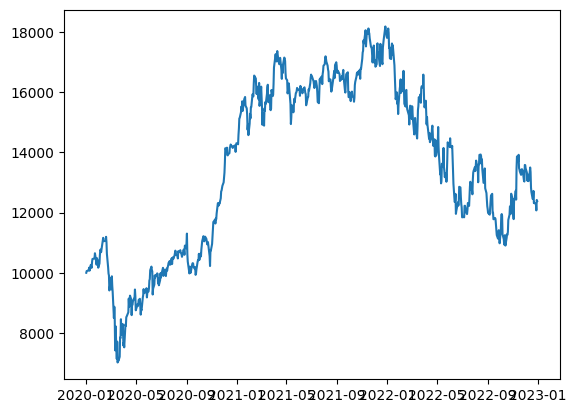

In [387]:
import matplotlib.pyplot as plt
chart = plt.subplot2grid((3, 2), (0, 0), rowspan=3, colspan=2)
chart.plot(result.portfolio.index, result.portfolio['market_value'])




In [366]:
c = set(result.trades["entry_date"].unique())


l = set(result.trades["exit_date"].unique())


len(list(c.union(l)))

285

In [388]:
result.portfolio

,cash,equity,margin,market_value,pnl,unrealized_pnl,fees
date,,,,,,,
2020-01-02,10000.00,10000.00,0.0,10000.00,0.00,0.0,0.0
2020-01-03,399.94,10056.93,0.0,10056.93,56.93,0.0,0.0
2020-01-06,399.94,10066.54,0.0,10066.54,66.54,0.0,0.0
2020-01-07,399.94,10082.28,0.0,10082.28,82.28,0.0,0.0
2020-01-08,399.94,10088.83,0.0,10088.83,88.83,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23,13.89,12325.63,0.0,12325.63,2325.63,0.0,0.0
2022-12-27,13.89,12272.13,0.0,12272.13,2272.13,0.0,0.0
2022-12-28,14.90,12070.71,0.0,12070.71,2070.71,0.0,0.0


In [389]:
result.portfolio.to_csv("old_tech.csv")

In [243]:
for c in cur2:
    val = (sum(list(c.values())))
    print(val)
  


    

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [271]:
len(trigs)

829

In [401]:
result.portfolio.to_csv("results_old_tech.csv")

In [383]:

cur2=[]
def set_target_shares(
    ctxs: dict[str, ExecContext],
    targets: dict[str, float]
):
    #print(ctxs)
    for symbol, target in targets.items():
        ctx = ctxs[symbol]
        target_shares = ctx.calc_target_shares(target)
        print(target_shares)
        pos = ctx.long_pos()
        if pos is None:
            ctx.buy_shares = target_shares
        elif pos.shares < target_shares:
            ctx.buy_shares = target_shares - pos.shares
        elif pos.shares > target_shares:
            ctx.sell_shares = pos.shares - target_shares


    #print(((ctxs["TSLA"]._curr_date)))
def shell(ctxs:dict[str, ExecContext]):
    #print(ctxs)
    pass 
    

def buy_low(ctxs: dict[str, ExecContext]):
    # If shares were already purchased and are currently being held, then return.
    triggered = False 
    dt = tuple(ctxs.values())[0].dt
    date_object = datetime.strptime(str(dt), "%Y-%m-%d %H:%M:%S")

# Convert datetime object to the desired format
    dt2 = date_object.strftime("%Y-%m-%d")
    st0 = start_date_temp.strftime("%Y-%m-%d")
    st0 = str(st0)
    #print(dt2)
    if dt2 == "2020-01-02":
       #print(dt2)
       for s in set_inital_allocations.keys():
          shares = ctxs[s].calc_target_shares(set_inital_allocations[s])
          ctxs[s].buy_shares = shares

    else:
        cur_allocs={}
        for ct in list(ctxs.keys()):
            #print(list(ctxs.keys()))
            #rint(ct)
            
            pos = ctxs[ct].long_pos()
            
            if pos:
                position = pos.shares
            else:
                position=0
            
            cur_alloc = ctxs[ct].open[0] * float(position) / config.initial_cash
            #print(cur_alloc)
                #print(pos.shares)
            #print(ct)
            cur_allocs[ct] = cur_alloc
            
            #print(cur_)

        


            if abs(set_inital_allocations[ct] - cur_alloc)/set_inital_allocations[ct] >= 0.05:
                    triggered = True 
                     

        cur2.append(cur_allocs)

        if triggered:
           #print("triggered")

           n_subst1 = ["INTC", "MSFT" , "TXN" , "AMD" , "HPQ"  , "GE" , "IBM"]

                    #shares_t

           for n in n_subst1:
                shares = ctxs[n].calc_target_shares(0.07)
                pos = ctxs[n].long_pos()
                #print(pos.shares)
                if not pos: 
                 ctxs[n].buy_shares = shares
                elif pos.shares < shares:
                 ctxs[n].buy_shares = shares - pos.shares
                else:
                 ctxs[n].sell_shares = pos.shares-shares  
                
                

                
           mv_1 = {}
           for k,m in mva.items():
                df_temp = mva[k]
                mv = df_temp[df_temp["date"]==dt2]["mva"].values[0]
                mv_1[k] = mv

           mv_1 = dict(sorted(mv_0.items(), key=lambda x: x[1], reverse=True))

           to_buy = list(mv_1.keys())[:3]

           for t in to_buy:
                if t in n_subst1:

                    shares_51 = ctxs[t].calc_target_shares(0.24)

                else:

                    shares_51 = ctxs[t].calc_target_shares(0.17)

                ctxs[n].buy_shares = shares_51

        else:
            print("not triggered")


   
       
 



      

strategy = Strategy(YFinance(), start_date=start_date, end_date=end_date,config=config)
strategy.set_before_exec(buy_low)
strategy.add_execution(shell, securities)

#strategy.add_execution(short_high, ['MSFT'])

result = strategy.backtest()





Backtesting: 2020-01-01 00:00:00 to 2023-01-01 00:00:00

Loaded cached bar data.

Test split: 2020-01-02 00:00:00 to 2022-12-30 00:00:00


  0% (0 of 756) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
C:\Users\DELL\AppData\Local\Temp\ipykernel_22156\3513702299.py:67: RuntimeWarning: invalid value encountered in double_scalars
  if abs(set_inital_allocations[ct] - cur_alloc)/set_inital_allocations[ct] >= 0.05:
C:\Users\DELL\AppData\Local\Temp\ipykernel_22156\3513702299.py:67: RuntimeWarning: invalid value encountered in double_scalars
  if abs(set_inital_allocations[ct] - cur_alloc)/set_inital_allocations[ct] >= 0.05:
C:\Users\DELL\AppData\Local\Temp\ipykernel_22156\3513702299.py:67: RuntimeWarning: invalid value encountered in double_scalars
  if abs(set_inital_allocations[ct] - cur_alloc)/set_inital_allocations[ct] >= 0.05:


ValueError: For each symbol, only one of buy_shares or sell_shares can be set per bar.

In [391]:
result.trades.to_csv("old_tech_trades.csv")